In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from anomalydetector_evt.SPOT import SPOT

## CASO 1

In [2]:
np.random.seed(123)
data = np.random.rayleigh(scale=10, size=10000)

In [3]:
n_init = round(len(data) * 0.1) # 10% para entrenamiento
data_init = data[:n_init]

# Creamos la clase para detectar anomalías
anomalydetector = SPOT(data_init, p=0.98, q=10e-4)

# Iniciamos (POT)
anomalydetector.init()

# Guardar el zq inicial
excs = 0

x = []
for i in range(n_init, len(data)):
    try:
        new_value = data[i]
        anomalia = anomalydetector.update(new_value)

        if anomalia:
            x += [i]

    except Exception as e:
        excs += 1

[]

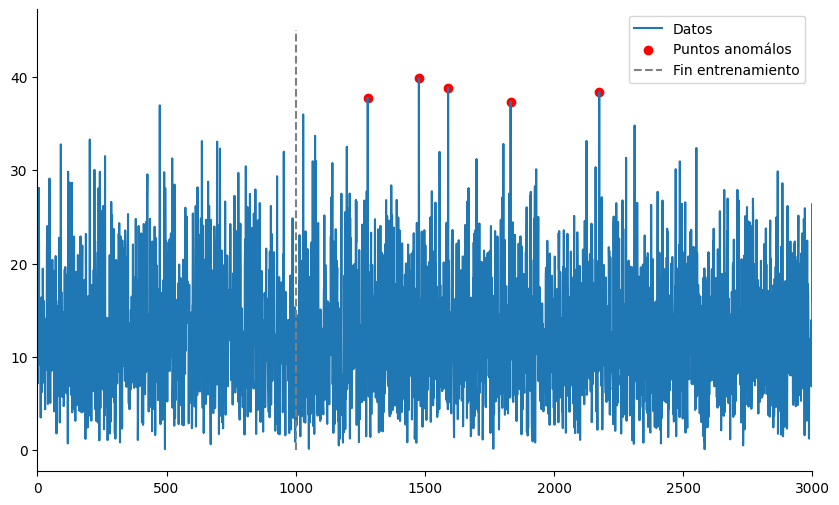

In [4]:
plt.figure(figsize=(10, 6))

plt.plot(data, label = 'Datos')
plt.scatter(x=x, y=anomalydetector.A, marker='o', color='red', label='Puntos anomálos')
plt.vlines(x=1000, ymin=0, ymax=45, color='gray', linestyle='dashed', label='Fin entrenamiento')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(0, 3000)
plt.legend()
plt.plot()

## CASO 2 

Datos simulados obtenidos de la base de datos Numenta Anomaly Benchmark.

In [5]:
data2 = pd.read_csv('art_daily_jumpsup.csv')
data2 = data2.value

In [6]:
n_init = round(len(data2) * 0.1) # 20% para entrenamiento
data_init = data2[:n_init]

# Creamos la clase para detectar anomalías
anomalydetector = SPOT(data_init, p=0.98, q=5e-4)

# Iniciamos (POT)
anomalydetector.init()

# Guardar el número de veces que no se encontró solución
excs = 0

x = [] # indices de las anomalías
for i in range(n_init, len(data2)):

    try:
        # Nuevo valor
        new_value = data2[i]

        # Verificar anomalía
        anomalia = anomalydetector.update(new_value)

        # Si hay anomalía se guarda el índice (para el gráfico)
        if anomalia:
            x.append(i)

    # Si no existe solución 
    except Exception as e:
        excs += 1

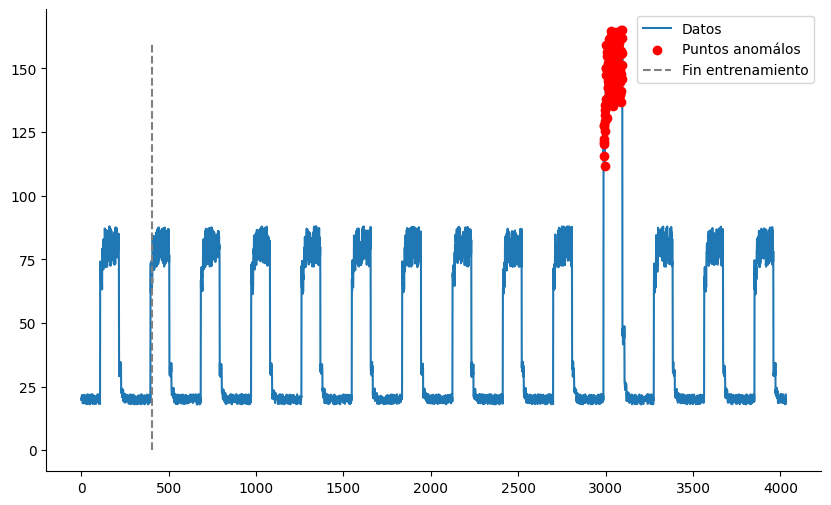

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(data2, label = 'Datos')
plt.scatter(x=x, y=anomalydetector.A, marker='o', color='r', label='Puntos anomálos', zorder=2)
plt.vlines(x=n_init, ymin=0, ymax=160, color='gray', linestyle='dashed', label='Fin entrenamiento')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()